In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.io import loadmat

from tensorflow.keras.layers import Input, Dense, Reshape, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras import losses, utils
from tensorflow.keras.models import Model

In [2]:
file = loadmat('/content/drive/MyDrive/spike_data.mat')
data = file['wf']

In [3]:
# training dataset
x_train = data[18][1]
x_train = np.append(x_train, data[18][2], axis=0)
x_train = np.append(x_train, data[18][4], axis=0)

y_train = np.ones(x_train.shape[0])
y_train[:data[18][1].shape[0]] = 0
y_train[data[18][1].shape[0]:data[18][2].shape[0]] = 1
y_train[data[18][2].shape[0]:] = 2
y_train = y_train.astype(np.int32)

In [4]:
# testing datatest
x_test = data[20][1]
x_test = np.append(x_test, data[20][2], axis=0)
x_test = np.append(x_test, data[20][3], axis=0)

y_test = np.ones(x_test.shape[0])
y_test[:data[20][1].shape[0]] = 0
y_test[data[20][1].shape[0]:data[20][2].shape[0]] = 1
y_test[data[20][2].shape[0]:] = 2
y_test = y_test.astype(np.int32)

In [8]:
def build():
  raw_data = Input(shape=(64,1))

  conv1 = Conv1D(filters=8, kernel_size=3, strides=1, padding='valid', activation='relu')(raw_data)
  pool1 = MaxPooling1D(pool_size=2, strides=1, padding='valid')(conv1)

  conv2 = Conv1D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu')(pool1)
  pool2 = MaxPooling1D(pool_size=2, strides=1, padding='valid')(conv2)

  conv3 = Conv1D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu')(pool2)
  pool3 = MaxPooling1D(pool_size=2, strides=1, padding='valid')(conv3)

  flattened = Flatten()(pool3)

  dense = Dense(units=32, activation='relu')(flattened)
  output = Dense(units=3, activation='softmax')(dense)

  model = Model(inputs=raw_data, outputs=output)
  return model

spk_sorting_cnn = build()
spk_sorting_cnn.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
spk_sorting_cnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 1)]           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 62, 8)             32        
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 61, 8)             0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 59, 16)            400       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 58, 16)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 56, 16)            784       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 55, 16)            0     

In [9]:
h = spk_sorting_cnn.fit(x_train, y_train,
                batch_size=320,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, y_test)
                )

Epoch 1/10
20/20 [==============================] - 2s 63ms/step - loss: 0.4206 - accuracy: 0.8257 - val_loss: 6.6662 - val_accuracy: 0.3423
Epoch 2/10
20/20 [==============================] - 1s 53ms/step - loss: 0.2233 - accuracy: 0.8959 - val_loss: 7.0553 - val_accuracy: 0.3499
Epoch 3/10
20/20 [==============================] - 1s 55ms/step - loss: 0.1988 - accuracy: 0.9126 - val_loss: 6.9829 - val_accuracy: 0.3494
Epoch 4/10
20/20 [==============================] - 1s 52ms/step - loss: 0.1898 - accuracy: 0.9151 - val_loss: 7.0394 - val_accuracy: 0.3440
Epoch 5/10
20/20 [==============================] - 1s 50ms/step - loss: 0.1846 - accuracy: 0.9191 - val_loss: 7.4094 - val_accuracy: 0.3541
Epoch 6/10
20/20 [==============================] - 1s 53ms/step - loss: 0.1927 - accuracy: 0.9086 - val_loss: 7.0429 - val_accuracy: 0.3449
Epoch 7/10
20/20 [==============================] - 1s 52ms/step - loss: 0.1858 - accuracy: 0.9150 - val_loss: 7.2473 - val_accuracy: 0.3376
Epoch 8/10
20

In [10]:
y_predict = spk_sorting_cnn.predict(x_test)

In [11]:
'''y_result = np.amax(y_predict, axis=1)
print(y_predict)
print(y_result)'''

'y_result = np.amax(y_predict, axis=1)\nprint(y_predict)\nprint(y_result)'

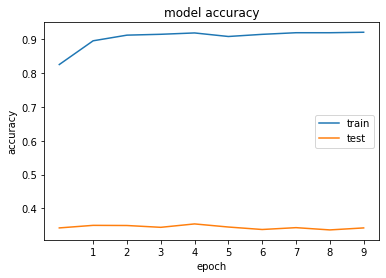

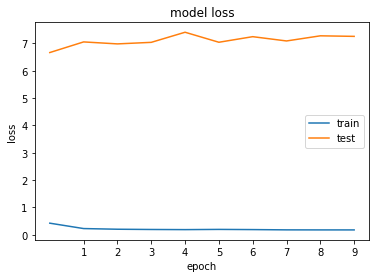

In [15]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.xticks(range(1, 10))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()
#loss model
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xticks(range(1, 10))
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()